In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\kushal\Desktop\Modular_aprr\modular\ML_live_class\data\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df['total_expenses'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_expenses
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_expenses', ylabel='sales'>

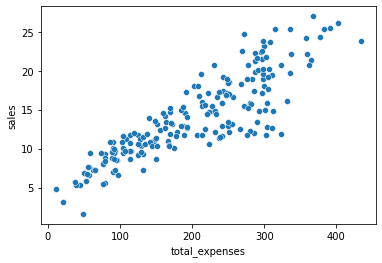

In [8]:
sns.scatterplot(data=df, x='total_expenses' , y = 'sales')

<AxesSubplot:xlabel='total_expenses', ylabel='sales'>

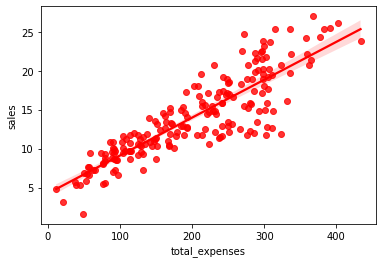

In [9]:
sns.regplot(data=df, x='total_expenses' , y = 'sales', color='red')

In [12]:
x = df['total_expenses']
y = df['sales']

In [13]:
np.polyfit(x,y, deg=1)

array([0.04868788, 4.24302822])

In [14]:
potential_spent = np.linspace(0,500,100)

In [15]:
predicted_sales = 0.04868788*potential_spent + 4.24302822

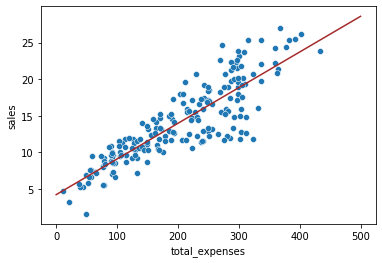

In [16]:
sns.scatterplot(x='total_expenses', y = 'sales', data=df)
plt.plot(potential_spent, predicted_sales, color = 'brown')

In [17]:
np.polyfit(x,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
pot_spent = np.linspace(0,500,100)

In [20]:
pred_sales = 3.07615033e-07*pot_spent**3 + -1.89392449e-04*pot_spent**2 + 8.20886302e-02*pot_spent + 2.70495053e+00
#pred_sales 

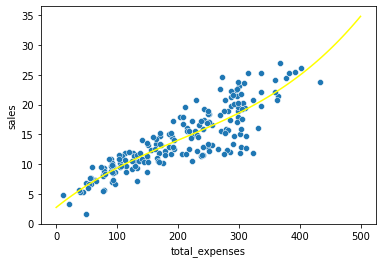

In [21]:
sns.scatterplot(x='total_expenses', y = 'sales', data=df)
plt.plot(pot_spent, pred_sales, color = 'yellow')

Text(0.5, 1.0, 'newspaper_spent')

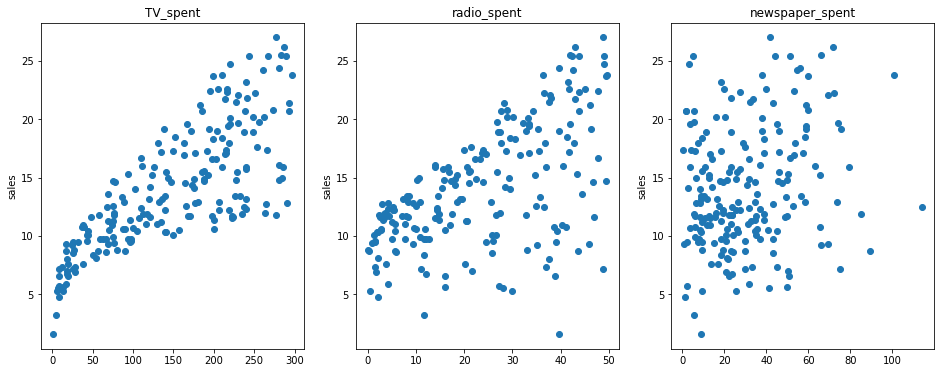

In [22]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('sales')
axes[0].set_title('TV_spent')


axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('sales')
axes[1].set_title('radio_spent')


axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper_spent')

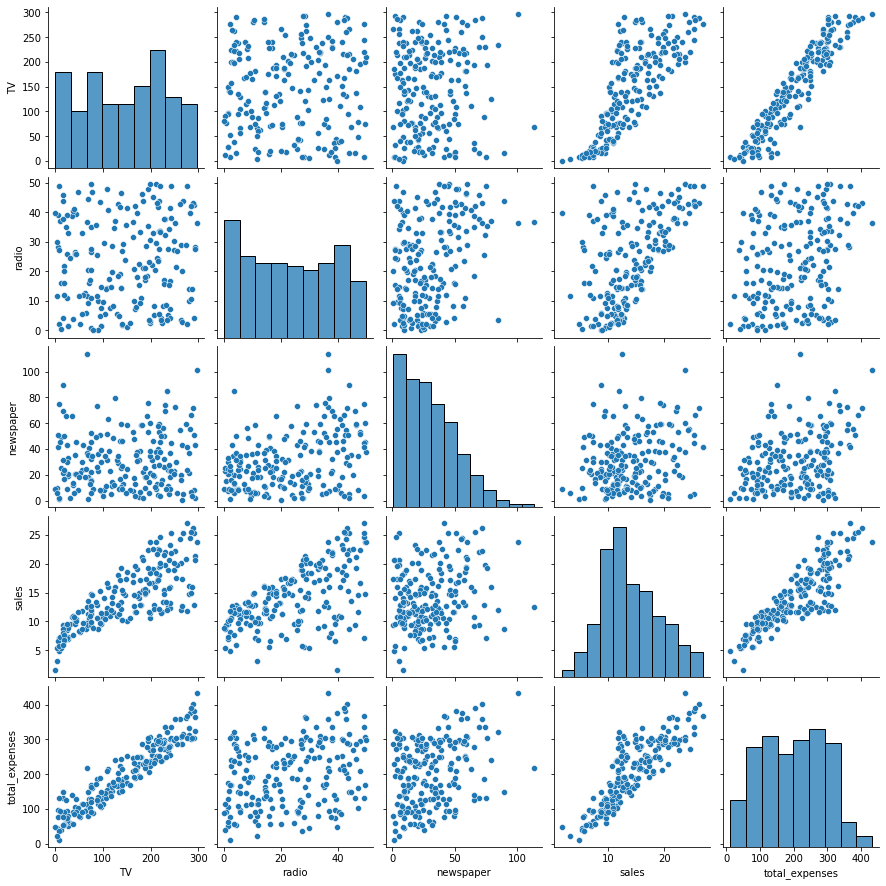

In [23]:
sns.pairplot(df)

In [25]:
x = df.drop(['sales', 'total_expenses'], axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [28]:
x_train.head()

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8


In [29]:
x_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [31]:
len(df)

200

In [32]:
len(x_train)

134

In [33]:
len(x_test)

66

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(x_train, y_train)

LinearRegression()

In [38]:
test_pred = model.predict(x_test)
#test_pred

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<AxesSubplot:xlabel='sales', ylabel='Count'>

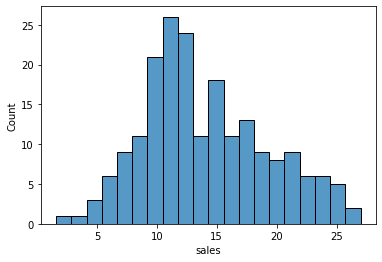

In [40]:
sns.histplot(data = df, x = 'sales', bins = 20)

In [41]:
mean_absolute_error(y_test, test_pred)

1.236918849425931

In [42]:
mean_squared_error(y_test, test_pred)

2.348375242713827

In [47]:
np.sqrt(mean_squared_error(y_test, test_pred))

1.532440942651242

In [44]:
r2_score(y_test, test_pred)

0.9231300835158752

#Now we are checking wheteher linear regression model is valid for our dataset or not

In [45]:
test_residuals = y_test - test_pred
test_residuals

37    -0.943438
109    0.219217
31     0.472822
89    -0.204943
66     0.323548
         ...   
183    2.282263
127    2.018084
53     1.354705
100   -2.168582
93     1.123234
Name: sales, Length: 66, dtype: float64

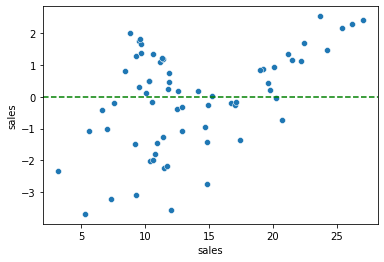

In [46]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0, color ='green', ls= '--')

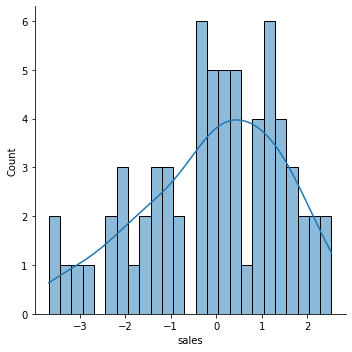

In [48]:
sns.displot(test_residuals, bins = 25, kde = True)

In [49]:
model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

In [50]:
y_hat = model.predict(x)
#y_hat

Text(0.5, 1.0, 'newspaper_spent')

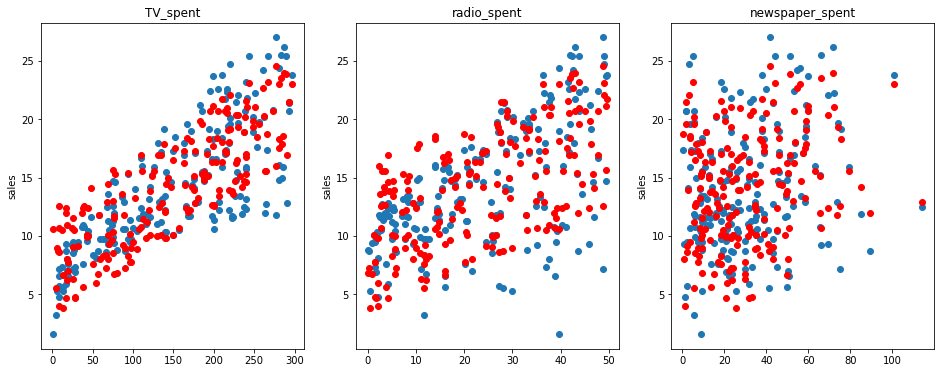

In [51]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel('sales')
axes[0].set_title('TV_spent')


axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color = 'red')
axes[1].set_ylabel('sales')
axes[1].set_title('radio_spent')


axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color = 'red')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper_spent')

In [52]:
from joblib import dump, load
# used to save file as binary

In [53]:
import os

In [54]:
model_dir = "models"
os.makedirs(model_dir, exist_ok= True)
filepath = os.path.join(model_dir, 'model.joblib')
dump(model,filepath)

['models\\model.joblib']

In [56]:
load_model = load(r'C:\Users\kushal\Desktop\Modular_aprr\modular\ML_live_class\models\model.joblib')

In [57]:
load_model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

Polynomial regression

In [59]:
x1 = df.drop(['sales','total_expenses'], axis=1)
x1.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [61]:
x1.shape

(200, 3)

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
poly_conv = PolynomialFeatures(degree=2, include_bias= False)
#polynomial features generation

In [64]:
poly_conv.fit(x1)

PolynomialFeatures(include_bias=False)

In [65]:
poly_features = poly_conv.transform(x1)

In [66]:
poly_features.shape

(200, 9)

In [67]:
x1.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [68]:
poly_features[0]
# polynomial features generation with exponentials and interaction terms


array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

In [70]:
model1 = LinearRegression()

In [71]:
model1.fit(x_train,y_train)

LinearRegression()

In [72]:
test_pred = model1.predict(x_test)

In [73]:
test_pred

array([13.97204613, 19.31163632, 12.34937446, 16.77918795,  7.86585082,
        6.91555804, 20.11299294, 17.49707854, 10.56626076, 20.12510306,
        9.45653268, 14.08673516, 12.06855682, 23.37172536, 19.67600099,
        9.14838427, 12.13661295,  9.25938961,  8.42727726, 21.64817709,
        7.0207988 , 19.36930318, 27.21526812, 24.54515558,  8.98640103,
       11.86761484, 20.38278449,  9.22102483, 12.76121768,  8.64739673,
        8.67463214, 20.20034879, 10.93174941,  6.85739529, 18.29226844,
        9.5074497 , 10.35219229,  9.64459655,  7.4384789 , 11.03480643,
       12.66080843, 10.69057937, 11.23958513,  7.4725002 , 11.38637684,
       10.2667274 ,  6.12707279, 15.54892762, 13.43339421, 22.70762962,
       10.41887348, 13.24665286, 14.2399427 , 11.85682389, 11.71631169,
        5.5519889 , 25.01544605,  9.5463153 , 17.34861031, 15.7728373 ,
       15.51033662, 25.57307088,  8.60367331, 21.60788857, 12.34127765,
       22.21531611])

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
MAE = mean_absolute_error(y_test,test_pred)

In [76]:
MAE

0.48428105352155604

In [77]:
MSE = mean_squared_error(y_test,test_pred)
MSE

0.4202814842156997

In [78]:
RMSE = np.sqrt(MSE)
RMSE

0.648291203253368

when rmse and mae score of polynomial regression model are compared with linear regression model we notice much lesser errors in case of polynomial regression, so we can come to conclusion that polynomial regression model is more accurate than linear regression model.

In [79]:
model1.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [86]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converter.fit_transform(x1)
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

    model = LinearRegression()
    model.fit(x_train, y_train)



    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [87]:
train_rmse_errors

[1.7376515982447711,
 0.5947926597019145,
 0.4405973423236366,
 0.35329132820381154,
 0.24845371846975603,
 0.18845830472067404,
 4.825746959186925,
 0.1535173770854948,
 0.15445197942391045]

In [88]:
test_rmse_errors
#overfitting happens after 5th exponential
# error shoots up after 5th degree
# maybe 4th degree would be the optimal polynomial degree.

[1.5324409426512418,
 0.648291203253368,
 0.5577254823372888,
 0.5064297314457543,
 2.3573666926363916,
 11.255414044642277,
 1206.1172828237368,
 3259.8747924014956,
 150614.9420814636]

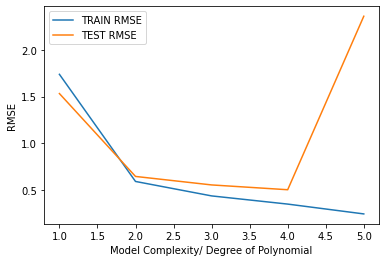

In [89]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST RMSE')
plt.xlabel('Model Complexity/ Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

based on the above plot we could choose a degree of 2 or 3 for the polynomial model.

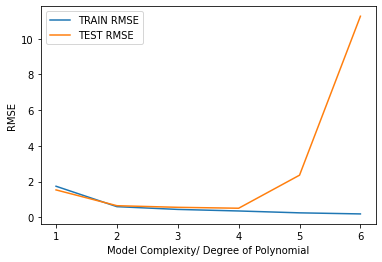

In [91]:
plt.plot(range(1,7), train_rmse_errors[:6], label = 'TRAIN RMSE')
plt.plot(range(1,7), test_rmse_errors[:6], label = 'TEST RMSE')
plt.xlabel('Model Complexity/ Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

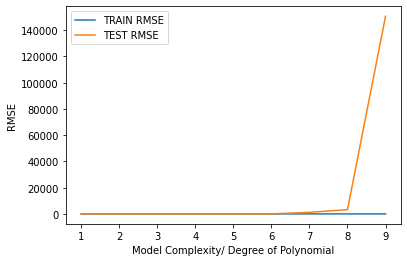

In [92]:
plt.plot(range(1,10), train_rmse_errors[:10], label = 'TRAIN RMSE')
plt.plot(range(1,10), test_rmse_errors[:10], label = 'TEST RMSE')
plt.xlabel('Model Complexity/ Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()

In [93]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [94]:
final_model = LinearRegression()

In [95]:
full_converted_x = final_poly_converter.fit_transform(x)
final_model.fit(full_converted_x,y)

LinearRegression()

In [96]:
model_dir = "models"
os.makedirs(model_dir, exist_ok= True)
filepath = os.path.join(model_dir, 'poly.joblib')
dump(final_model,filepath)

['models\\poly.joblib']

In [98]:
model_dir = "models"
os.makedirs(model_dir, exist_ok= True)
filepath = os.path.join(model_dir, 'final_converter.joblib')
dump(final_poly_converter,filepath)

['models\\final_converter.joblib']

In [100]:
loaded_converter = load(r'C:\Users\kushal\Desktop\Modular_aprr\modular\ML_live_class\models\final_converter.joblib')

In [99]:
loaded_model= load(r'C:\Users\kushal\Desktop\Modular_aprr\modular\ML_live_class\models\poly.joblib')

In [101]:
loaded_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])

In [104]:
example = [[245,78,94,87,65,98,90,76,56,78,98,97,65,59,34,123,71,82,13]]

In [105]:
loaded_model.predict(example)

array([30.21899954])